## $y$ \~ $ax+b$

## $y$ $=$ $ax+b+\epsilon$

## $y$ ~ $N(ax+b, \sigma^2)$

In [1]:
import matplotlib
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)
niter = 1000

Optimization terminated successfully.
         Current function value: 22.774653
         Iterations: 14
         Function evaluations: 25
         Gradient evaluations: 25


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 380.51it/s]


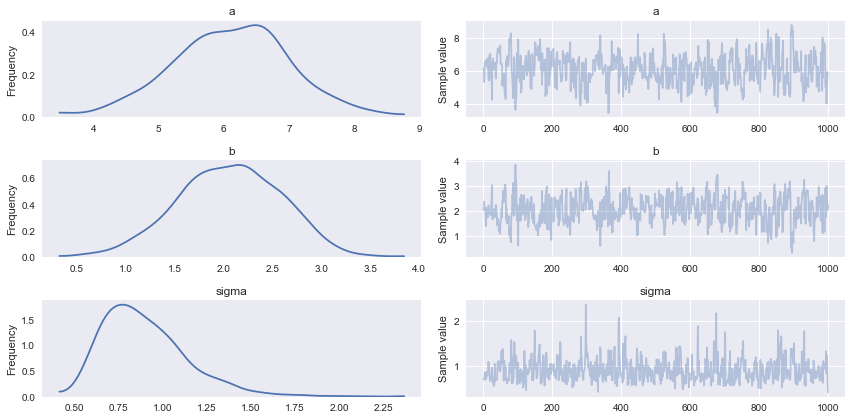

In [3]:
with pm.Model() as model:
    # prior
    a = pm.Normal('a', mu=0, sd=20)
    b = pm.Normal('b', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=20)
    y_est = a*x + b
    
    #likelihood
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(niter, step, start=start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

In [4]:
data = dict(x=x, y=y)

with pm.Model() as model:
    pm.glm.glm('y ~ x', data)
    step = pm.NUTS()
    trace = pm.sample(2000, step, progressbar=True)

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.49it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A675B3C940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A675CFBDD8>]], dtype=object)

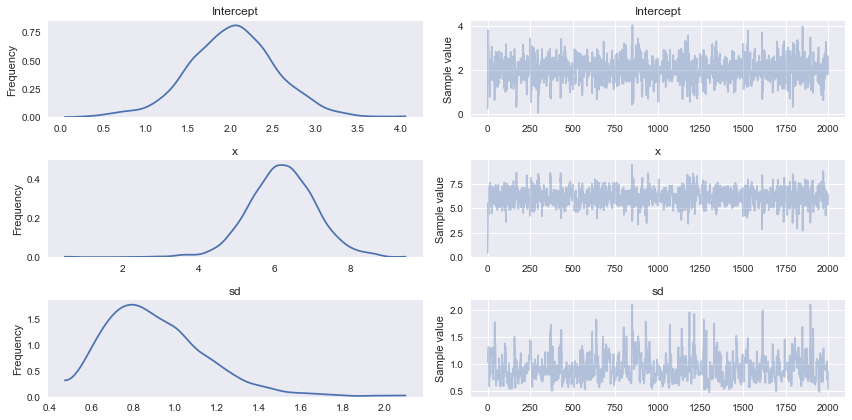

In [5]:
pm.traceplot(trace)

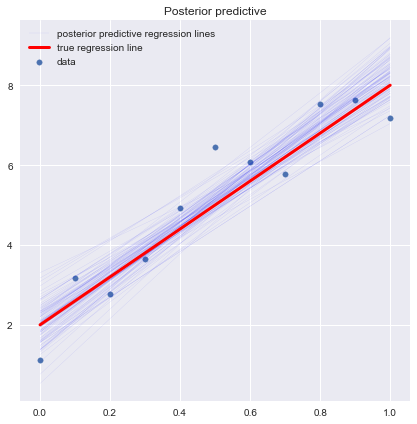

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(x, y, s=30, label='data')
pm.glm.plot_posterior_predictive(trace, samples=100,
                                 label='posterior predictive regression lines',
                                 c='blue', alpha=0.2)
plt.plot(x, _a*x + _b, label='true regression line', lw=3., c='red')
plt.legend(loc='best')

In [7]:
import pandas as pd

In [35]:
df = pd.read_csv('HtWt.csv', sep=',')
df.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [37]:
niter = 1000
with pm.Model() as model:
    pm.glm.glm('male ~ height + weight', df, family=pm.glm.families.Binomial())
    trace = pm.sample(niter, step=pm.Slice(), random_seed=123, progressbar=True)

C:\Users\hjunk\Anaconda3\lib\site-packages\theano\tensor\basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 497.04it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A603891E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A603F5F240>]], dtype=object)

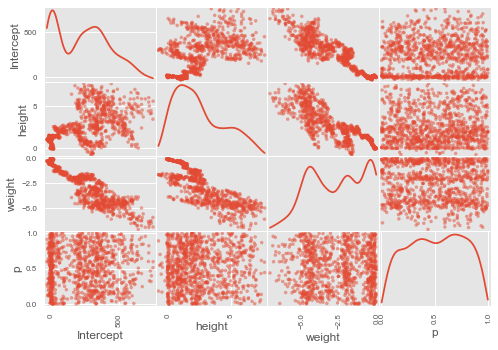

In [38]:
df_trace = pm.trace_to_dataframe(trace)
pd.plotting.scatter_matrix(df_trace[-1000:], diagonal='kde')

In [25]:
df_trace[-1000:]

,Intercept,height,weight,p
1000,255.601265,4.060232,-3.431959,0.423564
1001,266.860562,3.862771,-3.217401,0.034970
1002,261.053661,3.849745,-3.259957,0.027889
1003,211.465979,4.480812,-3.357712,0.019672
1004,211.114319,4.272450,-3.201927,0.920488
1005,179.358511,4.507083,-3.091604,0.947277
1006,158.849004,4.764024,-3.095483,0.085573
1007,118.429508,5.003835,-3.099179,0.033812
1008,111.060200,4.950792,-2.746315,0.035942
1009,112.501447,4.672506,-2.824947,0.151719


In [18]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -4.056           4.165            0.398            [-11.579, 4.436]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -11.199        -6.899         -4.333         -1.959         5.850


height:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.221            0.088            0.009            [0.100, 0.434]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.100          0.169          0.222          0.251          0.434


weight:

  Mean             SD               MC Error         95% HPD interval
  -----------------

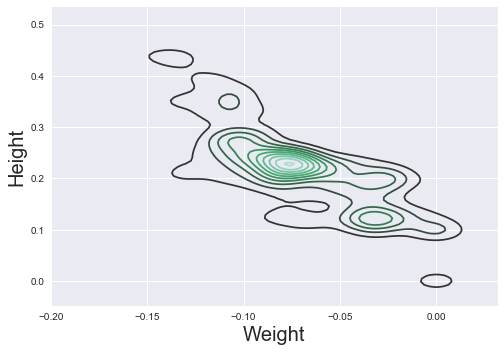

In [20]:
sns.kdeplot(trace['weight'], trace['height'])
plt.xlabel('Weight', fontsize=20)
plt.ylabel('Height', fontsize=20)
plt.style.use('ggplot')

